<a href="https://colab.research.google.com/github/mr-abhishek9279/mr-abhishek9279/blob/main/new_cats_dogs(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 169MB/s]
100% 1.06G/1.06G [00:05<00:00, 211MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.2136 - accuracy: 0.5998 - val_loss: 0.6121 - val_accuracy: 0.6550
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6106 - accuracy: 0.6798 - val_loss: 0.5863 - val_accuracy: 0.6804
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5034 - accuracy: 0.7537 - val_loss: 0.5644 - val_accuracy: 0.7104
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4409 - accuracy: 0.7969 - val_loss: 0.4889 - val_accuracy: 0.7720
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4025 - accuracy: 0.8167 - val_loss: 0.4581 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3185 - accuracy: 0.8612 - val_loss: 0.4692 - val_accuracy: 0.7804
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2475 - accuracy: 0.8947 - val_loss: 0.6130 - val_ac

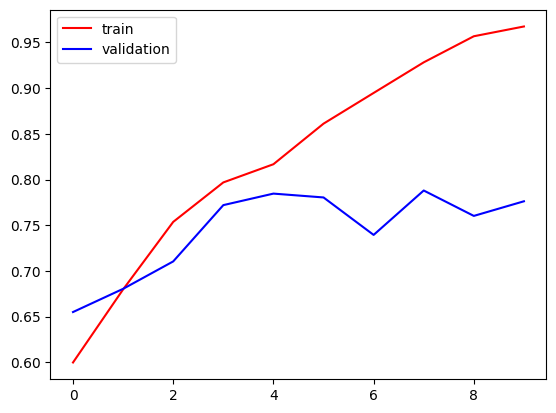

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

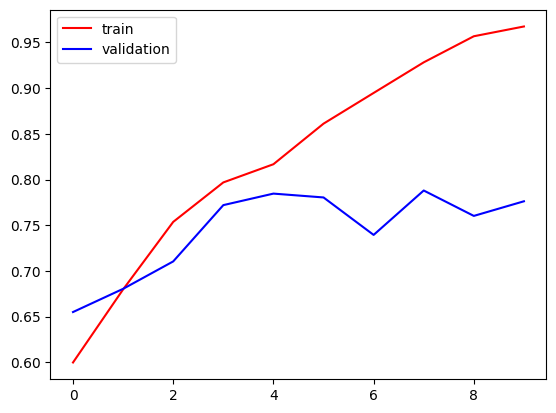

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

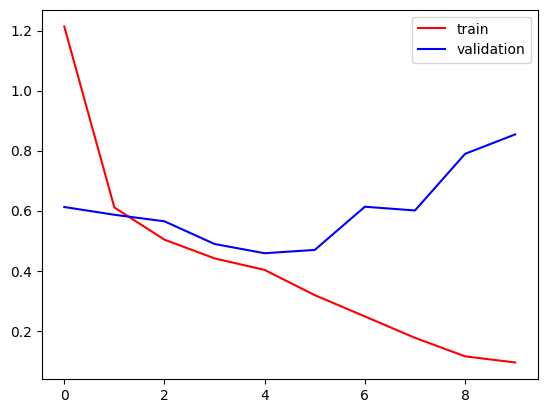

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

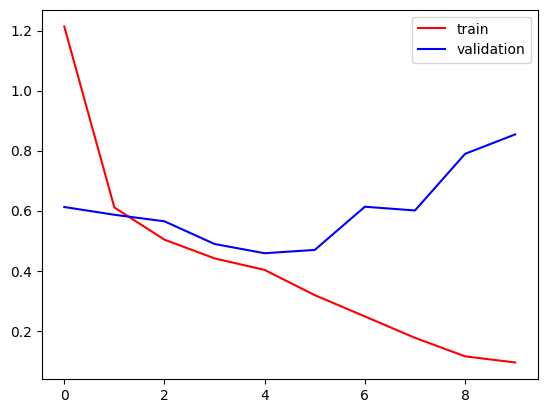

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# need to reduce complexity
# add more data
# reducing complexity

In [16]:
import cv2

In [17]:
test_image = cv2.imread('/content/catimag.jpeg')

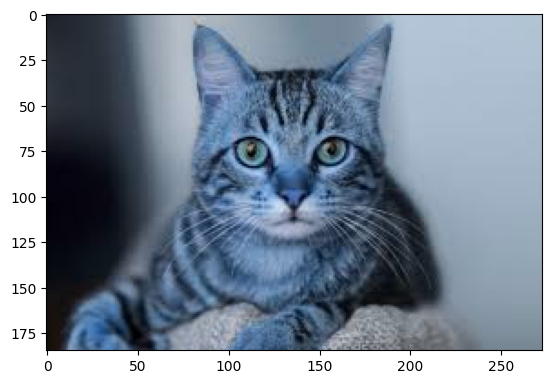

In [18]:
plt.imshow(test_image)

In [19]:
test_image.shape

(185, 273, 3)

In [20]:
test_image = cv2.resize(test_image,(256,256))

In [21]:
test_image.shape

(256, 256, 3)

In [22]:
test_input = test_image.reshape(1,256,256,3)

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 382ms/step


array([[0.]], dtype=float32)

In [32]:
# array is 0 then its is cat and other wise its a dog.